Digit Recoginization ML Model using tenserflow

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist    ##loding digit dataset 

Spliting data into test and train

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('x_train shape:',x_train.shape,'x_train dtype:',x_train.dtype,'\n y_train shape:',y_train.shape,'y_train dtype:',y_train.dtype)
print('x_test shape:',x_test.shape,'x_test dtype:',x_test.dtype,'\n y_test shape:',y_test.shape,'y_test dtype:',y_test.dtype)

x_train shape: (60000, 28, 28) x_train dtype: uint8 
 y_train shape: (60000,) y_train dtype: uint8
x_test shape: (10000, 28, 28) x_test dtype: uint8 
 y_test shape: (10000,) y_test dtype: uint8


In [5]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

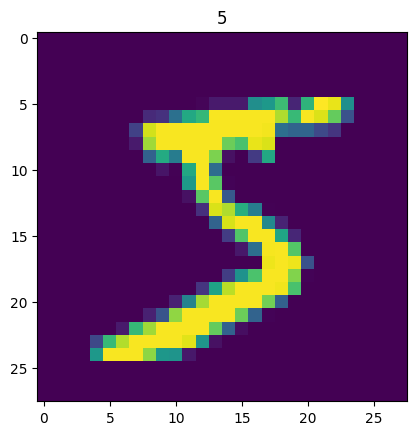

In [6]:
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

Preprocessing

In [7]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Creating Model

In [8]:
model = tf.keras.models.Sequential() 

In [9]:
model.add(tf.keras.layers.Flatten(input_shape = (28,28) ) )
model.add(tf.keras.layers.Dense(16, activation = 'relu') )
model.add(tf.keras.layers.Dropout(0.2) )
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

C:\Users\karan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer ='adam', loss ='SparseCategoricalCrossentropy', metrics =['accuracy'])

In [11]:
hist = model.fit(x_train, y_train, epochs =1000, validation_split =0.20, batch_size = 1000)

Epoch 1/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2508 - loss: 2.1150 - val_accuracy: 0.6801 - val_loss: 1.4803
Epoch 2/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6086 - loss: 1.4180 - val_accuracy: 0.7972 - val_loss: 0.9517
Epoch 3/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6907 - loss: 1.0538 - val_accuracy: 0.8398 - val_loss: 0.7136
Epoch 4/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7399 - loss: 0.8679 - val_accuracy: 0.8631 - val_loss: 0.5887
Epoch 5/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7697 - loss: 0.7677 - val_accuracy: 0.8763 - val_loss: 0.5144
Epoch 6/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7879 - loss: 0.6942 - val_accuracy: 0.8851 - val_loss: 0.4635
Epoch 7/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8028 - loss: 0.6494 - val_accuracy: 0.8925 - val_loss: 0.4280
Epoch 8/1000
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8111 - loss: 0.6177 - val_accuracy: 0

In [12]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [13]:
y_pred = y_prob.argmax(axis=1)

In [14]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.93      0.94      0.94      1032
           3       0.91      0.93      0.92      1010
           4       0.94      0.93      0.94       982
           5       0.90      0.90      0.90       892
           6       0.95      0.96      0.96       958
           7       0.95      0.93      0.94      1028
           8       0.91      0.91      0.91       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [15]:
test_loss, test_acc = model.evaluate(x_test,y_test)
print('accuracy :',test_acc)
print('loss :',test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9269 - loss: 0.3089
accuracy : 0.9362000226974487
loss : 0.2782168686389923


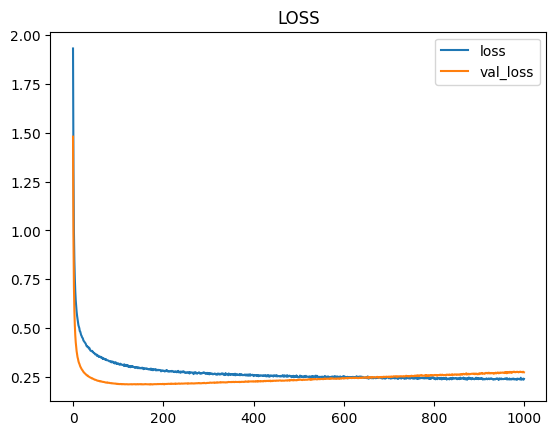

In [16]:
plt.plot(hist.history['loss'] , label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.title('LOSS')
plt.legend()
plt.show()

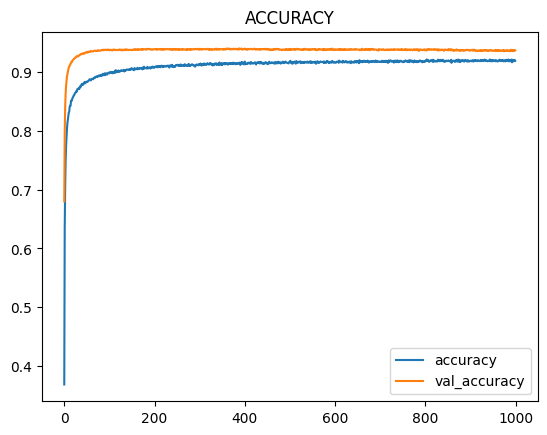

In [17]:
plt.plot(hist.history['accuracy'], label = 'accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.title('ACCURACY')
plt.legend()
plt.show()